# 1) Exploração de Dados de Aplicações

### **Desafio:**
- Identifique quantas candidaturas foram feitas por empresa.
- Liste as empresas que mais receberam aplicações.
- Calcule o tempo médio entre a aplicação e a resposta (caso exista a coluna 'Status Date').
- Gere um gráfico de barras com as 10 empresas mais aplicadas. \
- **Extra:** analise o comportamento temporal das candidaturas.

### 1. Importação e Carregamento de dados

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('Job_Applications.csv', encoding='utf-8')

df['Application Date'] = pd.to_datetime(df['Application Date'], errors='coerce')
df['Status Date'] = pd.to_datetime(df['Status Date'], errors='coerce')

df.head()

,Application Date,Contact Email,Contact Phone Number,Company Name,Job Title,Job Url,Resume Name,Question And Answers,Status Date,Tempo_resposta_dias
0,2024-10-24,steven.brown.dds1@hotmail.com,(170)159-5919x45757,FinSight,UX Designer,https://www.linkedin.com/jobs/view/ux-designer...,resume_5.pdf,Q: Do you have work authorization in this coun...,2024-11-24,31
1,2025-10-24,jeffrey.fleming@gmail.com,81 3370 1400,AlphaCreative,Backend Developer,https://www.linkedin.com/jobs/view/backend-dev...,LinkedIn_Resume_683.pdf,Q: Do you have experience with remote teams?\n...,2025-12-19,56
2,2024-11-26,eduarda.das.neves@hotmail.com,270-866-8826x3435,EduScale,DevOps Engineer,https://www.linkedin.com/jobs/view/devops-engi...,resume_3.pdf,Q: LinkedIn profile link?\nA: Yes — I collabor...,2025-01-22,57
3,2024-11-18,mariana.fogaça2025@gmail.com,0500-993-9330,CuraTech,HR Generalist,https://www.linkedin.com/jobs/view/hr-generali...,resume_5.pdf,Q: Why are you interested in this role?\nA: Ex...,2024-11-29,11
4,2025-05-19,samantha.jones2025@outlook.com,(499)471-7464,NeoBuild,UX Designer,https://www.linkedin.com/jobs/view/ux-designer...,CV_Samantha_3.pdf,Q: Why are you interested in this role?\nA: Mo...,2025-07-01,43


### 2. Aplicações por Empresa

In [32]:
aplicacoes_por_empresa = df['Company Name'].value_counts()

print("Aplicações por empresa:")
print(aplicacoes_por_empresa.head(10))

Aplicações por empresa:
Company Name
Helix Systems        20
Viva Retail          18
ByteForge            17
SafeHarbor           17
UrbanNest            16
NimbusAI             14
Skyline Solutions    13
ModaCasa             13
TechWave             13
Translink            11
Name: count, dtype: int64


**Legenda:** \
Aqui identificamos quantas vezes cada empresa recebeu candidaturas. Isso nos ajuda a perceber onde houve mais interesse do candidato (ou mais oportunidades publicadas).

### 3. Top 3 Empresas Mais Aplicadas

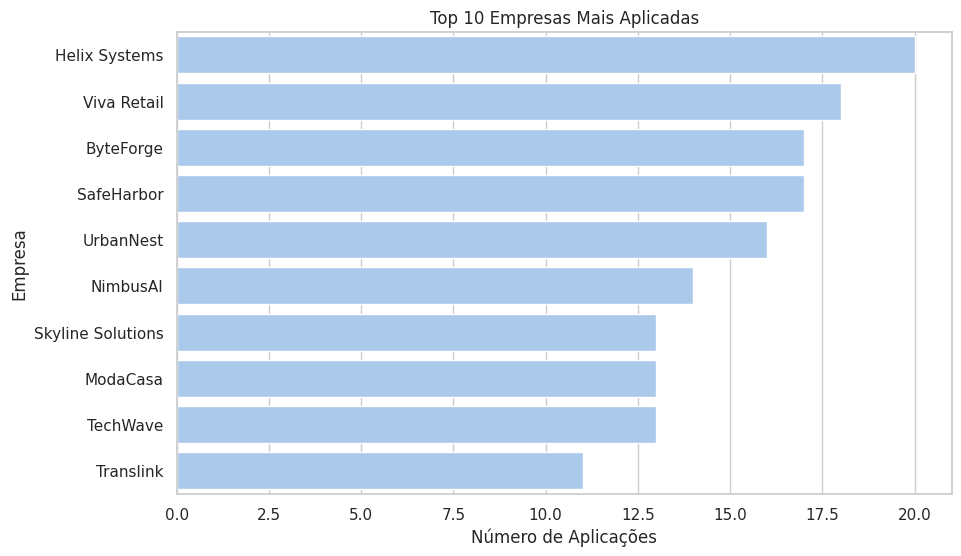

In [36]:
top_10_empresas = aplicacoes_por_empresa.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_empresas.values, y=top_10_empresas.index)
plt.title('Top 10 Empresas Mais Aplicadas')
plt.xlabel('Número de Aplicações')
plt.ylabel('Empresa')
plt.show()

**Legenda:** \
As empresas no topo do gráfico são as que mais receberam candidaturas, indicam maior atratividade ou volume de vagas.

### 4. Tempo Médio de Respostas das Empresas

In [38]:
df['Tempo_resposta_dias'] = (df['Status Date'] - df['Application Date']).dt.days
tempo_medio = df['Tempo_resposta_dias'].mean()

print(f"Tempo médio de resposta das empresas: {tempo_medio:.2f} dias")

Tempo médio de resposta das empresas: 31.43 dias


### 5. Análise Temporal das Candidaturas

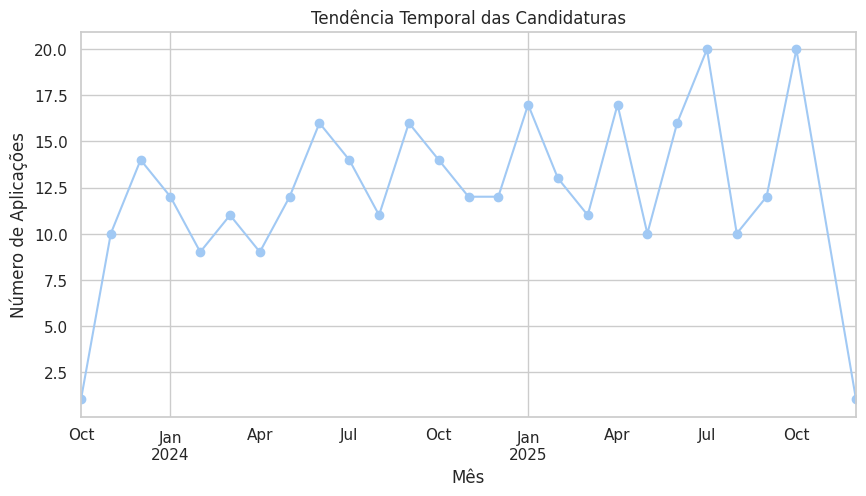

In [41]:
aplicacoes_mensais = df.groupby(df['Application Date'].dt.to_period('M')).size()

plt.figure(figsize=(10,5))
aplicacoes_mensais.plot(kind='line', marker='o')
plt.title('Tendência Temporal das Candidaturas')
plt.xlabel('Mês')
plt.ylabel('Número de Aplicações')
plt.show()

**Legenda:** \
Aqui observamos os períodos em que houve mais aplicações, interessante para entender padrões sazonais. Exemplo: início do ano ou pós-férias.

### 6. Tempo Médio de Resposta por Empresa

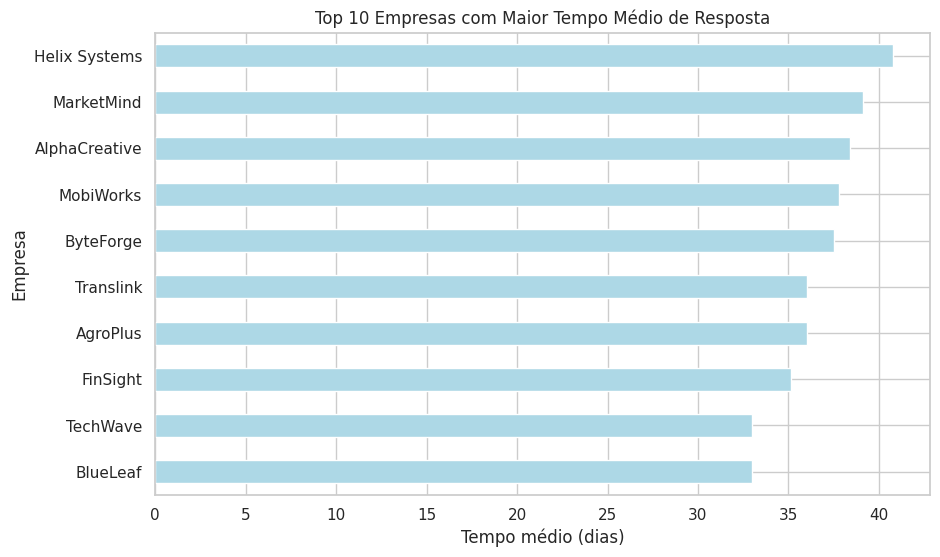

In [42]:
tempo_por_empresa = df.groupby('Company Name')['Tempo_resposta_dias'].mean().sort_values()

plt.figure(figsize=(10,6))
tempo_por_empresa.tail(10).plot(kind='barh', color='lightblue')
plt.title('Top 10 Empresas com Maior Tempo Médio de Resposta')
plt.xlabel('Tempo médio (dias)')
plt.ylabel('Empresa')
plt.show()

**Legenda:** \
As empresas no topo demoram mais para responder. Podendo indicar processos seletivos mais longos ou simplesmente lentidão no retorno ao candidato.

Em média demoram em torno de 36 dias para dar retorno, tendo em base o menor tempo no grafico (por volta de 32) e o máximo de tempo (41)

### 7. **(Extra)** Relação entre Volume de Candidatos e Tempo de Resposta

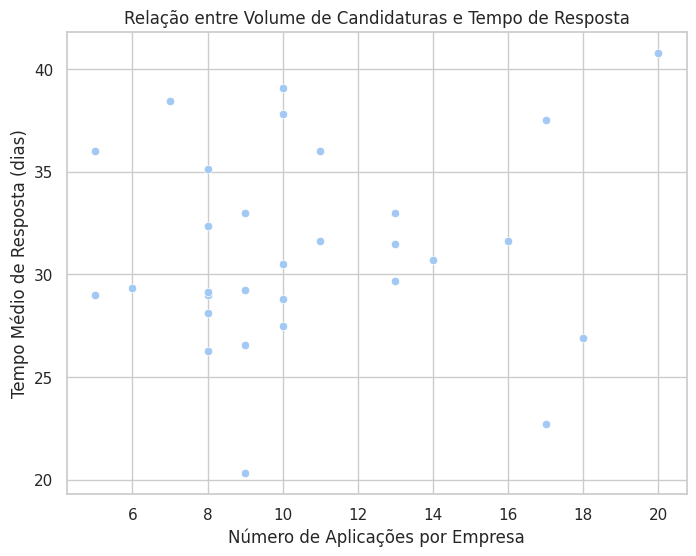

In [43]:
resumo = df.groupby('Company Name').agg({
    'Tempo_resposta_dias': 'mean',
    'Company Name': 'count'
}).rename(columns={'Company Name': 'Aplicações'}).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=resumo,
    x='Aplicações',
    y='Tempo_resposta_dias'
)
plt.title('Relação entre Volume de Candidaturas e Tempo de Resposta')
plt.xlabel('Número de Aplicações por Empresa')
plt.ylabel('Tempo Médio de Resposta (dias)')
plt.show()


**Legenda:** \
É possível verificar se empresas com mais candidaturas demoram mais tempo para responder. Relação comum em processos seletivos de grande porte.

### 8. Conclusão

Mesmo sendo um dataset sintético, para analisarmos uma maior quantidade de dados, conseguimos simular um fluxo completo de candidaturas. \
A análise mostra padrões curiosos, como picos de aplicação em determinados meses e tempos médios de resposta relativamente altos.

De forma geral, conseguimos o seguinte resumo final:
- Tempo médio de resposta || =~ 36 dias
- Empresas mais aplicadas || Helix Systems, Viva Retail e ByteForge
- Mês com mais candidaturas|| Julho-Agosto e Outubro
- Distribuição de resposta || Entre 20–40 dias

# 2) Análise de Respostas de Triagem

### **Desafio:**
- Extraia as perguntas de triagem mais frequentes.
- Classifique respostas por sentimento (positivo, neutro, negativo).
- Gere uma nuvem de palavras e um gráfico de dispersão entre o tamanho das respostas e o sentimento médio.

### 1. Importação e Carregamento de dados

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [60]:
df = pd.read_csv('Job Applicant Saved Screening Question Responses.csv', encoding='utf-8')

df.head()

,Date,Company,Question,Answer
0,2025-01-01,InovaCorp,Have you completed a college degree?,"My English is intermediate, but I can handle p..."
1,2024-11-15,DataPulse,What is your expected salary range?,I have some experience but not a leadership ro...
2,2024-11-25,TechWave,Are you available to start immediately?,I’d rather not answer this question at the mom...
3,2025-03-09,GreenMind,What is your level of English proficiency?,I’m available to start right away and very exc...
4,2024-11-15,NovaVision,Are you available for frequent travel?,I’d rather not answer this question at the mom...


### 2. Verifica as colunas do Dataset

In [61]:
df.columns

Index(['Date', 'Company', 'Question', 'Answer'], dtype='object')

**Legenda:** \
Escolhi fazer com um dataset com perguntas em inglês pois na análise de sentimento ele tem uma performance muito melhor do que em português.

### 3. Indentifica Perguntas de Triagem Frequentes

In [68]:
print("Perguntas de triagem mais frequentes:")
print(perguntas_freq)

Perguntas de triagem mais frequentes:
Question
Have you completed a college degree?              29
What is your expected salary range?               26
What is your level of English proficiency?        21
Are you comfortable working in a hybrid model?    21
Why do you want to work with us?                  20
Are you willing to relocate to another city?      18
Are you available to start immediately?           17
What is your main professional strength?          17
Are you available for frequent travel?            16
Do you have experience managing teams?            15
Name: count, dtype: int64


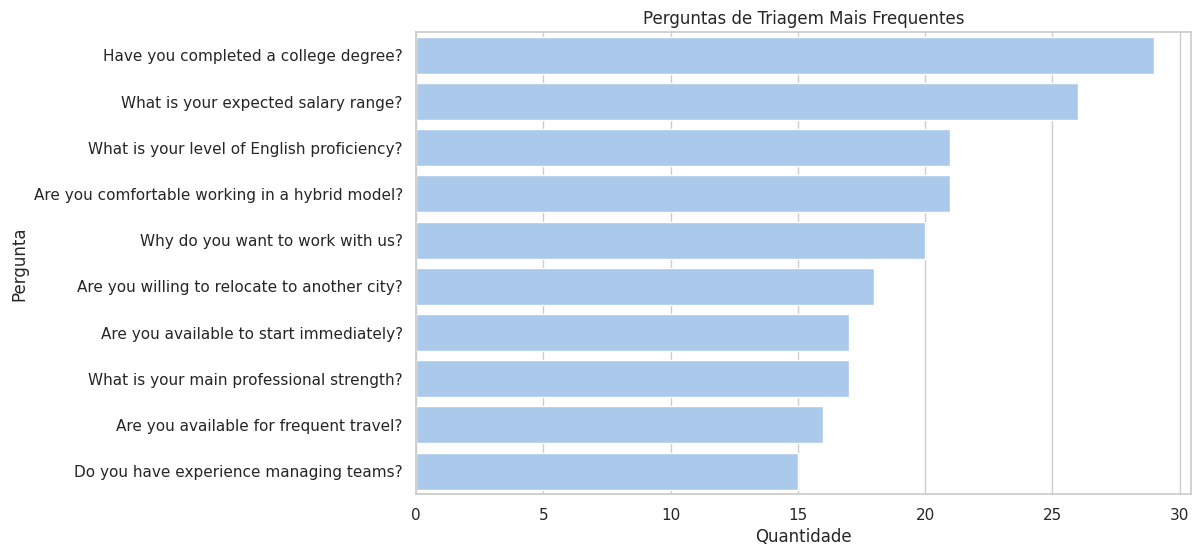

In [62]:
# Contar perguntas repetidas
perguntas_freq = df['Question'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=perguntas_freq.values, y=perguntas_freq.index)
plt.title('Perguntas de Triagem Mais Frequentes')
plt.xlabel('Quantidade')
plt.ylabel('Pergunta')
plt.show()

**Legenda:** \
Essas são as perguntas mais comuns feitas pelas empresas no processo de triagem.

### 4. Análise de Sentimento das Respostas

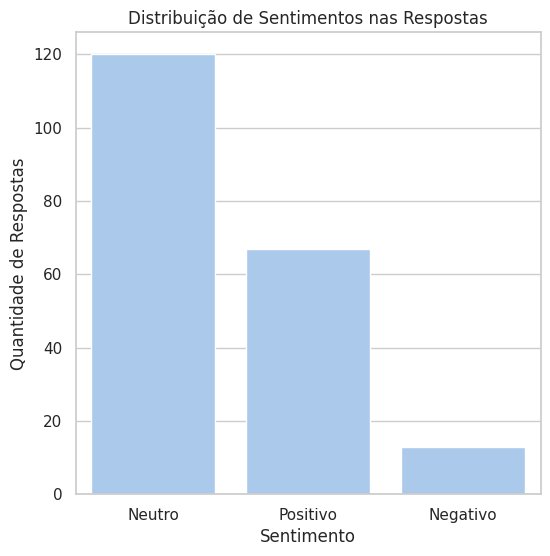

,Question,Answer,Sentimento
0,Have you completed a college degree?,"My English is intermediate, but I can handle p...",Neutro
1,What is your expected salary range?,I have some experience but not a leadership ro...,Neutro
2,Are you available to start immediately?,I’d rather not answer this question at the mom...,Neutro
3,What is your level of English proficiency?,I’m available to start right away and very exc...,Positivo
4,Are you available for frequent travel?,I’d rather not answer this question at the mom...,Neutro
5,Have you completed a college degree?,I’m not available to start immediately.,Negativo
6,Have you completed a college degree?,I’m available to start right away and very exc...,Positivo
7,Do you have experience managing teams?,I have some experience but not a leadership ro...,Neutro
8,Have you completed a college degree?,My English is basic; I’m still studying to imp...,Neutro
9,Do you have experience managing teams?,My English is basic; I’m still studying to imp...,Neutro


In [64]:
# Garantir que não tenha nulos
df['Answer'] = df['Answer'].fillna('')

# Função para analisar sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'Positivo'
    elif polarity < -0.1:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplicar ao dataset
df['Sentimento'] = df['Answer'].apply(get_sentiment)

sent_counts = df['Sentimento'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x=sent_counts.index, y=sent_counts.values)
plt.title('Distribuição de Sentimentos nas Respostas')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade de Respostas')
plt.show()

df[['Question', 'Answer', 'Sentimento']].head(10)


**Legenda:** \
Agora sabemos se as respostas são geralmente positivas (ex: entusiasmo), neutras ou negativas (ex: desinteresse ou rejeição).

### 5. Geração de Nuvem de Palavras

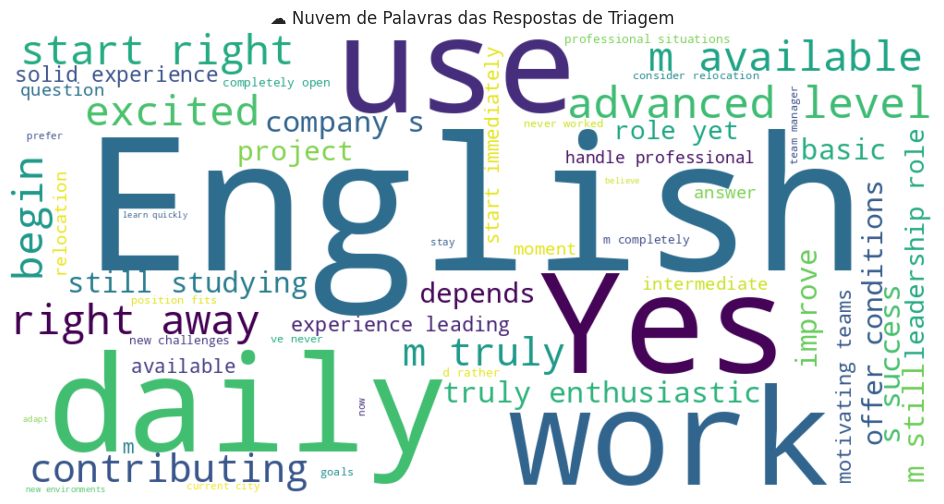

In [65]:
# Unir todas as respostas em um único texto
texto_respostas = " ".join(df['Answer'].astype(str))

# Gerar nuvem de palavras
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(texto_respostas)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ Nuvem de Palavras das Respostas de Triagem')
plt.show()


**Legenda:**\
A nuvem de palavras destaca os termos mais usados nas respostas, ajudando a identificar padrões de linguagem.

### 6. Análise entre tamanho das respostas e sentimento

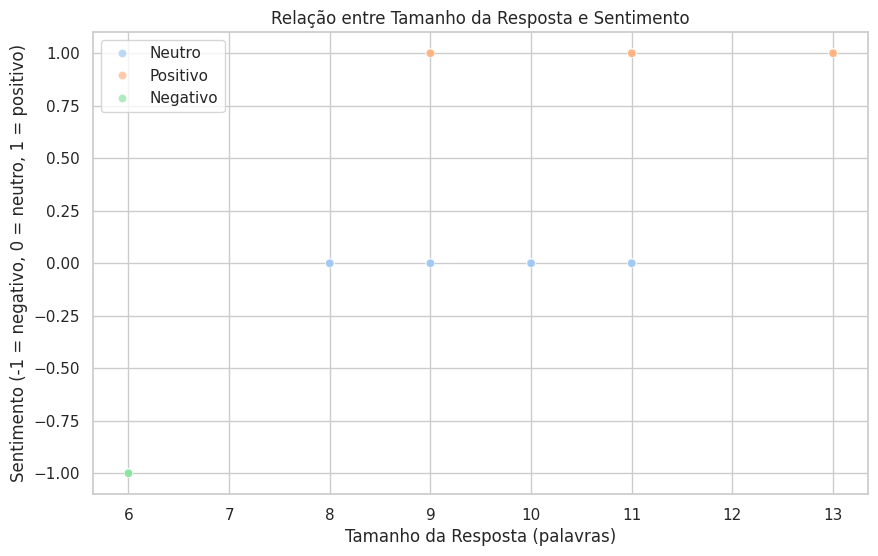

In [69]:
# Cria coluna com o tamanho das respostas
df['Tamanho_Resposta'] = df['Answer'].apply(lambda x: len(str(x).split()))

# Converter sentimento para um valor numérico
sentimento_map = {'Negativo': -1, 'Neutro': 0, 'Positivo': 1}
df['Sentimento_Num'] = df['Sentimento'].map(sentimento_map)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Tamanho_Resposta', y='Sentimento_Num', hue='Sentimento', alpha=0.7)
plt.title('Relação entre Tamanho da Resposta e Sentimento')
plt.xlabel('Tamanho da Resposta (palavras)')
plt.ylabel('Sentimento (-1 = negativo, 0 = neutro, 1 = positivo)')
plt.legend()
plt.show()


**Legenda:**\
O gráfico indica que respostas mais longas tendem a ser mais positivas enquanto repostas negativas são menores

### 7. Conclusão

Com base na análise que realizei, consegui entender o comportamento das respostas de triagem, tanto em frequência quanto em sentimento, e observar que respostas mais detalhadas geralmente indicam maior envolvimento do candidato.

- Pergunta mais frequente | Have you completed a college degree?
- Sentimento Predominate | Neutro
- Tendência | Respostas mais longas geralmente têm mais sentimento positivo